# 3장 데이터 시각화

### 데이터 시각화의 목적
1. 데이터 탐색
2. 데이터 전달

이번 장의 목적 : 좋은 시각화와 그렇지 않은 시각화를 분별하기

In [10]:
from __future__ import unicode_literals
from collections import Counter

import matplotlib
matplotlib.rc('font',family='AppleGothic') 
# 한글 폰트명은 시스템에 따라 변경 가능

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Simple Graph

In [15]:
def make_simple_line_chart():
    
    years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
    gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
    
    # years : x-axis, gdp : y-axis
    # marker = 'v' : 
    # linestyle = 'solid' : 
    plt.plot(years, gdp, color = 'green', marker = 'v', linestyle = 'solid')
    
    # 제목 추가
    plt.title('Nominal GDP')
    
    # 축이름 추가
    plt.ylabel('Billions of $')
    plt.show()

C:\Users\PARK SEONGRI\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


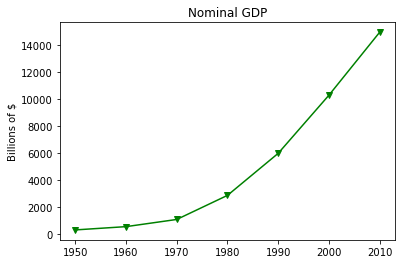

In [16]:
make_simple_line_chart()

## Bar Charts

막대 그래프(bar charts)는 이산적인(discrete) 항목에 대한 변화를 보여 줄 때 사용하면 좋다.

In [39]:
def make_simple_bar_chart():
    """ 그림 3-2. 간단한 막대 그래프 """

    movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
    num_oscars = [5, 11, 3, 8, 10]

    # discrete변수인 movies의 위치에 따라 숫자를 할당한다.
    # enumerate : 순서가 있는 자료형(list, tuple, string 등)을 입력받아, index값을 포함하는 객체를 return한다.
    xs = [i for i, _ in enumerate(movies)]
    # xs = [0, 1, 2, 3, 4]
    # 일반적은로 '_' 변수는 쓰지 않는 변수를 할당할 때 사용한다.

    # plot bars with left x-coordinates [xs], heights [num_oscars]
    plt.bar(xs, num_oscars)
    plt.ylabel("# of Academy Awards")
    plt.title("My Favorite Movies")

    # xs의 각 위치에 원래의 문자열인 movies를 labeling한다.
    plt.xticks(xs, movies)

    plt.show()

C:\Users\PARK SEONGRI\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


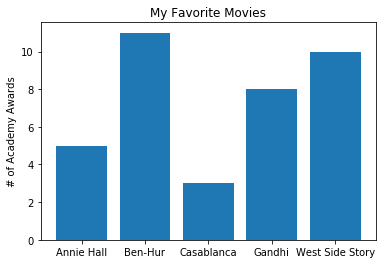

In [42]:
make_simple_bar_chart()

## Histogram

연속적인(continuous) 항목에 대해 정해진 구간을 나눠, 구간별로 원하는 값의 분포를 보여준다.

In [50]:
def make_histogram():
    """ 그림 3-3. 막대 그래프로 히스토그램 그리기 """

    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    # input 값의 10의 자리만 사용하는 함수
    decile = lambda grade: grade // 10 * 10
    # grades의 값에 decile함수를 적용한 값의 결과물의 개수를 세어준다.(우리가 원하는 결과 : counts)
    histogram = Counter(decile(grade) for grade in grades)
    # histogram = {80: 4, 70: 3, 0: 2, 90: 2, 100: 1, 60: 1}

    plt.bar([x for x in histogram.keys()],
            histogram.values(),                # give each bar its correct height
            8)                                 # give each bar a width of 8
    plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                               # y-axis from 0 to 5
    plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
    plt.xlabel("Decile")
    plt.ylabel("# of Students")
    plt.title("Distribution of Exam 1 Grades")
    plt.show()

C:\Users\PARK SEONGRI\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


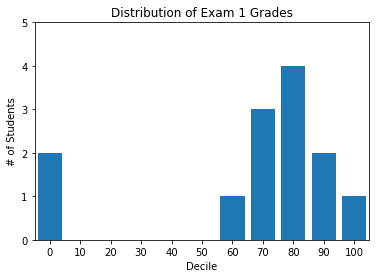

In [57]:
make_histogram()

막대 그래프의 y축의 scale을 잘못 설정하면, 잘못된 의미를 전달할 수 있다.

In [74]:
def make_misleading_y_axis(mislead=True):

    mentions = [500, 505]
    years = [2013, 2014]

    plt.bar(years, mentions, 0.8)
    plt.xticks(years)
    plt.ylabel("# of times I heard someone say 'data science'")

    plt.ticklabel_format(useOffset=False)

    if mislead:
        # misleading y-axis only shows the part above 500
        plt.axis([2012.5,2014.5,499,506]) # y축의 scale이 499 ~ 506 
        plt.title("Look at the 'Huge' Increase!")
    else:
        plt.axis([2012.5,2014.5,0,550]) # y축의 scale이 0 ~ 550
        plt.title("Not So Huge Anymore.")
    plt.show()

C:\Users\PARK SEONGRI\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


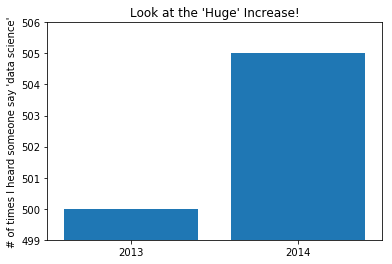

In [75]:
make_misleading_y_axis(mislead=True)
# y축의 scale을 잘못 설정하여, 5의 차이가 매우 큰 차이로 느껴진다.

C:\Users\PARK SEONGRI\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


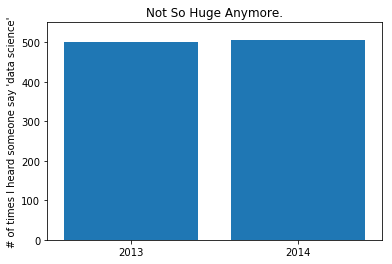

In [76]:
make_misleading_y_axis(mislead=False)
# scale을 잘 설정한 예시.

## Line Charts

선 그래프는 경향성을 표시할 때 유용하다.

In [60]:
def make_several_line_charts():

    variance     = [1,2,4,8,16,32,64,128,256]
    bias_squared = [256,128,64,32,16,8,4,2,1]
    # zip : 동일한 개수로 이루어진 자료형을 묶어주는 역할을 한다.
    total_error  = [x + y for x, y in zip(variance, bias_squared)]
    # zip(variance, bias_squared) = [(1,256), (2,128), ... , (256,1)]
    # total_error = [257, 130, 68, 40, 32, 40, 68, 130, 257]

    xs = range(len(variance))

    # we can make multiple calls to plt.plot
    # to show multiple series on the same chart
    plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
    plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
    plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

    # loc=9 means "top center"
    plt.legend(loc=9)
    plt.xlabel("model complexity")
    plt.title("The Bias-Variance Tradeoff")
    plt.show()

C:\Users\PARK SEONGRI\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


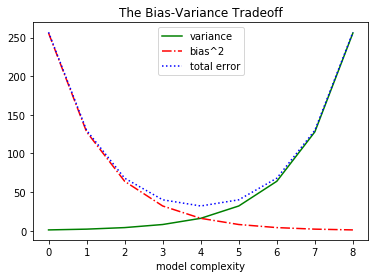

In [61]:
make_several_line_charts()

## Scatter Plots

산점도는 두 변수 간의 연관 관계를 보여주고 싶을 때 적합하다.

In [70]:
def make_scatter_plot():
    """ 그림 3-7. 친구의 수와 사이트 체류 시간에 관한 산점도 """

    friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
    minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

    plt.scatter(friends, minutes)

    # label each point
    for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
                     xy=(friend_count, minute_count), # put the label with its point
                     xytext=(5, -5), # but slightly offset, 각 점에 대한 labeling이 떨어진 거리(x축, y축)
                     textcoords='offset points')

    plt.title("Daily Minutes vs. Number of Friends")
    plt.xlabel("# of friends")
    plt.ylabel("daily minutes spent on the site")
    plt.show()

C:\Users\PARK SEONGRI\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


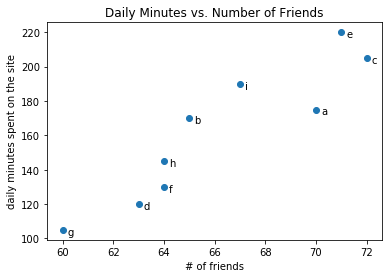

In [71]:
make_scatter_plot()

matplotlib를 이용하여 변수들간의 비교를 할 때, 자동으로 축의 범위를 설정하게 하면 축의 scale이 달라져 공정한 비교를 할 수 없다.

In [66]:
def make_scatterplot_axes(equal_axes=False):

    test_1_grades = [ 99, 90, 85, 97, 80]
    test_2_grades = [100, 85, 60, 90, 70]

    plt.scatter(test_1_grades, test_2_grades)
    plt.xlabel("test 1 grade")
    plt.ylabel("test 2 grade")

    if equal_axes:
        plt.title("Axes Are Comparable")
        plt.axis("equal") # X, Y 축간 간격을 적절히 조절함
    else:
        plt.title("Axes Aren't Comparable")

    plt.show()

C:\Users\PARK SEONGRI\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


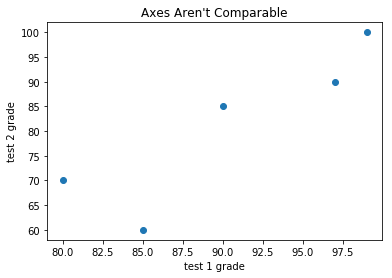

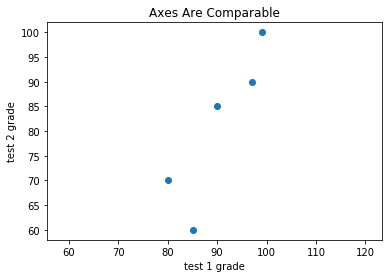

In [67]:
make_scatterplot_axes(equal_axes=False)
make_scatterplot_axes(equal_axes=True)